In [1]:
import pandas as pd
import numpy as np
import acquire as a
import new_lib as nl
import prepare as p
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

In [2]:
wine = a.acquire_wine()
wine = p.prepare_wine(wine)
wine
# acquire and prepare the data using functions from acquire.py and prepare.py

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(wine, 'quality')
# splitting data into train, validate, test splits

In [4]:
train_scaled, val_scaled, test_scaled = nl.scale_splits(X_train, X_val, X_test, MinMaxScaler(), columns = ['fixed_acidity', 'volatile_acidity', 
                                                                                                           'citric_acid', 'sugar', 
                                                                                                           'chlorides', 'free_sulfer', 
                                                                                                           'total_sulfer', 'density', 
                                                                                                           'pH', 'sulphates', 'alcohol'])
# creating scaled data for modeling and testing purposes

In [5]:
train_scaled
# checking the scale

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol
3899,0,0.264957,0.146667,0.198795,0.051780,0.051753,0.093750,0.274194,0.156846,0.480620,0.123596,0.666667
5268,0,0.145299,0.193333,0.192771,0.029126,0.028381,0.138889,0.221198,0.084055,0.534884,0.185393,0.681159
332,1,0.324786,0.333333,0.168675,0.080906,0.090150,0.069444,0.248848,0.436742,0.387597,0.179775,0.202899
274,1,0.282051,0.380000,0.108434,0.203883,0.126878,0.090278,0.202765,0.516898,0.511628,0.308989,0.202899
4326,0,0.196581,0.060000,0.186747,0.025890,0.048414,0.114583,0.264977,0.160312,0.263566,0.134831,0.362319
...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,0.239316,0.046667,0.204819,0.022654,0.045075,0.069444,0.394009,0.237435,0.465116,0.224719,0.405797
2129,0,0.188034,0.013333,0.210843,0.135922,0.060100,0.104167,0.223502,0.324090,0.550388,0.320225,0.246377
5437,0,0.196581,0.220000,0.132530,0.132686,0.066778,0.166667,0.313364,0.319757,0.325581,0.224719,0.173913
481,1,0.444444,0.146667,0.337349,0.067961,0.113523,0.017361,0.025346,0.397747,0.333333,0.393258,0.536232


In [6]:
train_scaled['quality'] = train['quality']
train_scaled
# re adding the quality column to the scaled data

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
3899,0,0.264957,0.146667,0.198795,0.051780,0.051753,0.093750,0.274194,0.156846,0.480620,0.123596,0.666667,7
5268,0,0.145299,0.193333,0.192771,0.029126,0.028381,0.138889,0.221198,0.084055,0.534884,0.185393,0.681159,7
332,1,0.324786,0.333333,0.168675,0.080906,0.090150,0.069444,0.248848,0.436742,0.387597,0.179775,0.202899,6
274,1,0.282051,0.380000,0.108434,0.203883,0.126878,0.090278,0.202765,0.516898,0.511628,0.308989,0.202899,5
4326,0,0.196581,0.060000,0.186747,0.025890,0.048414,0.114583,0.264977,0.160312,0.263566,0.134831,0.362319,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,0.239316,0.046667,0.204819,0.022654,0.045075,0.069444,0.394009,0.237435,0.465116,0.224719,0.405797,5
2129,0,0.188034,0.013333,0.210843,0.135922,0.060100,0.104167,0.223502,0.324090,0.550388,0.320225,0.246377,6
5437,0,0.196581,0.220000,0.132530,0.132686,0.066778,0.166667,0.313364,0.319757,0.325581,0.224719,0.173913,5
481,1,0.444444,0.146667,0.337349,0.067961,0.113523,0.017361,0.025346,0.397747,0.333333,0.393258,0.536232,8


In [7]:
def visual_correlations(df):
    '''
    This function creates a heatmap of the features
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    count_var = ['red_or_white', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'sugar', 'chlorides', 'free_sulfer', 'total_sulfer', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

    train_corr = df[count_var].corr()
    
    plt.title('Strength of correlation with quality')
    
    return sns.heatmap(train_corr, annot=True, annot_kws={"size": 7}, linewidths=2, linecolor='yellow')
# Function to create a heatmap visual of the data

<AxesSubplot:title={'center':'Strength of correlation with quality'}>

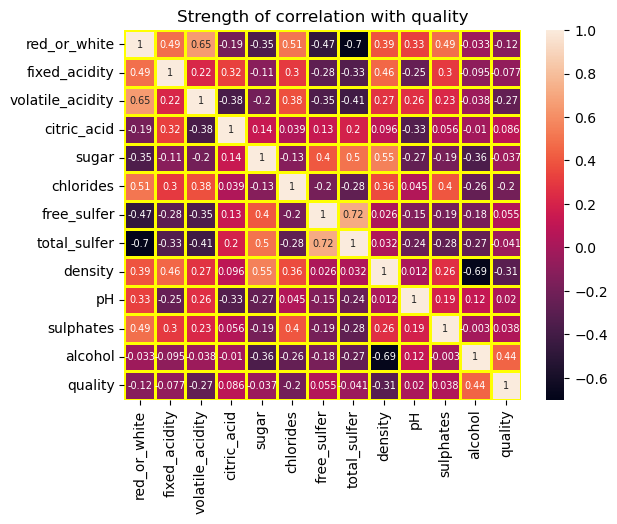

In [8]:
hm_visual = visual_correlations(wine)
hm_visual
# heatmap visualized

In [9]:
def rfe(X, y, n):
    '''
    This function takes in the features, target variable 
    and number of top features desired and returns a dataframe with
    the features ranked
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import SelectKBest, f_regression, RFE
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=n)
    rfe.fit(X, y)
    ranks = rfe.ranking_
    columns = X.columns.tolist()
    feature_ranks = pd.DataFrame({'ranking': ranks, 'feature': columns})
    return feature_ranks.sort_values('ranking')
# Function to create feature engineering using rfe to select best features

In [10]:
# Feture engineering usings RFE to confirm best features.
feature_ranks = rfe(train_scaled, y_train, 4)
feature_ranks

,ranking,feature
2,1,volatile_acidity
10,1,sulphates
11,1,alcohol
12,1,quality
4,2,sugar
8,3,density
1,4,fixed_acidity
9,5,pH
6,6,free_sulfer
0,7,red_or_white


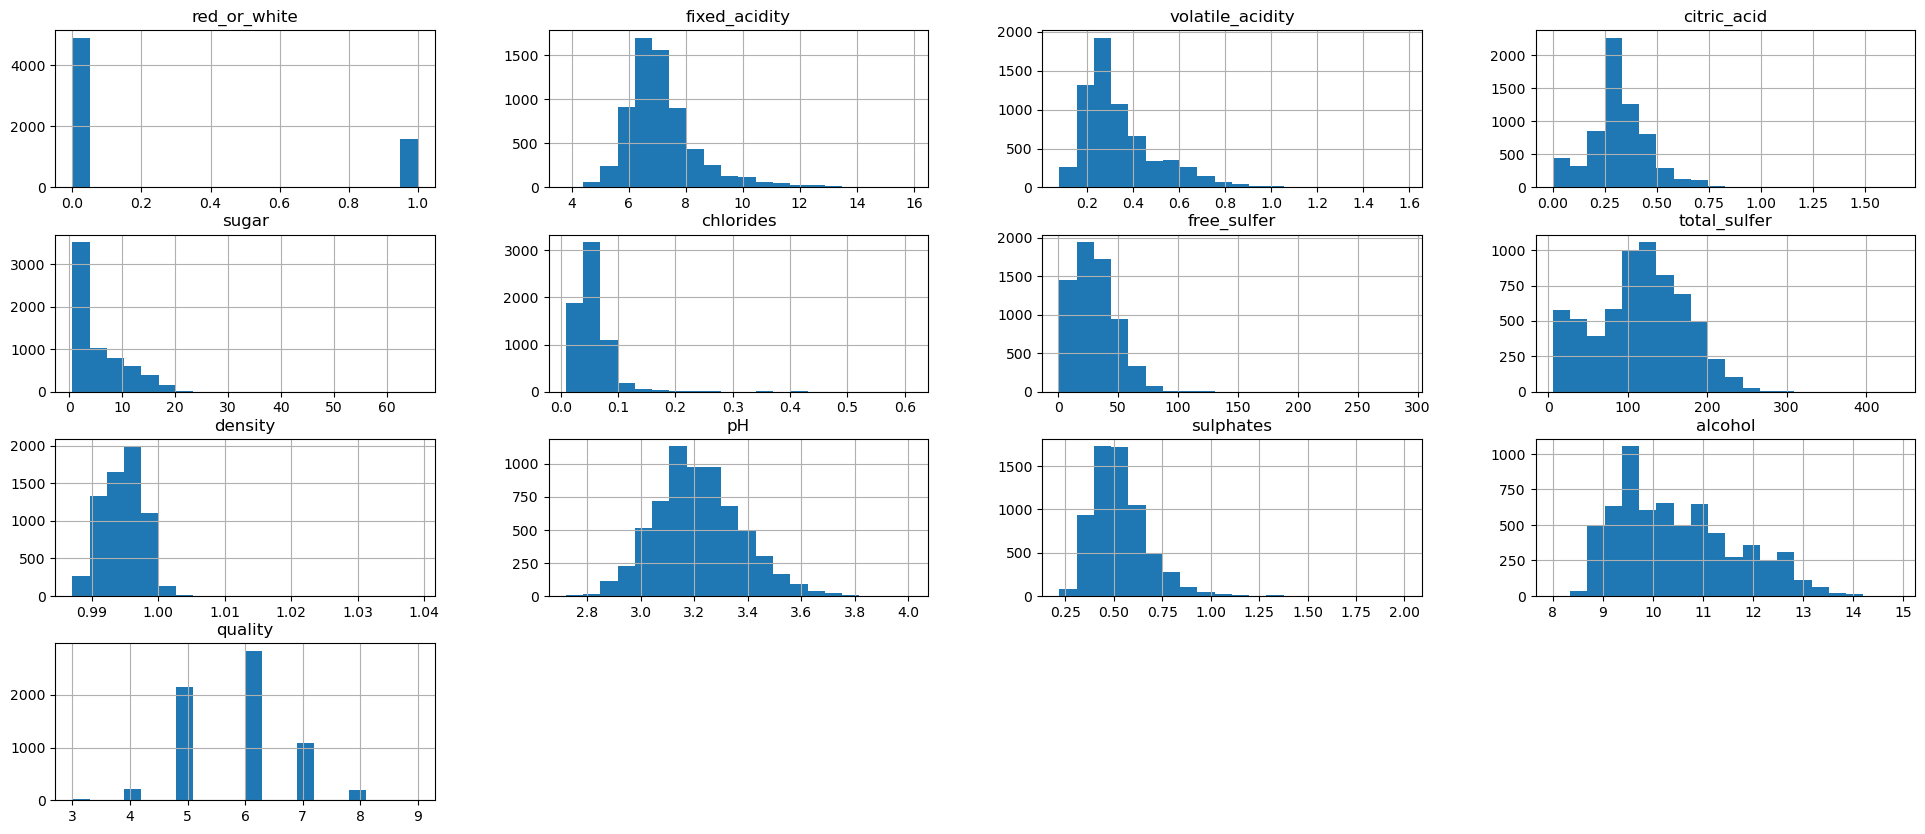

In [11]:
wine.hist(figsize=(24, 10), bins=20)
plt.show()
# data examined

In [12]:
red = wine[wine.red_or_white == 1]
good_red = red[red.quality >= 7 ]
good_red.red_or_white.count()/len(wine[wine.red_or_white == 1])
## ratio of high quality reds

0.1357098186366479

In [13]:
good_red

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
7,1,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,1,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,1,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,1,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,1,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,1,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,1,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,1,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [14]:
bad_red = red[red.quality < 7 ]
# creating a bad_wine category to examine data

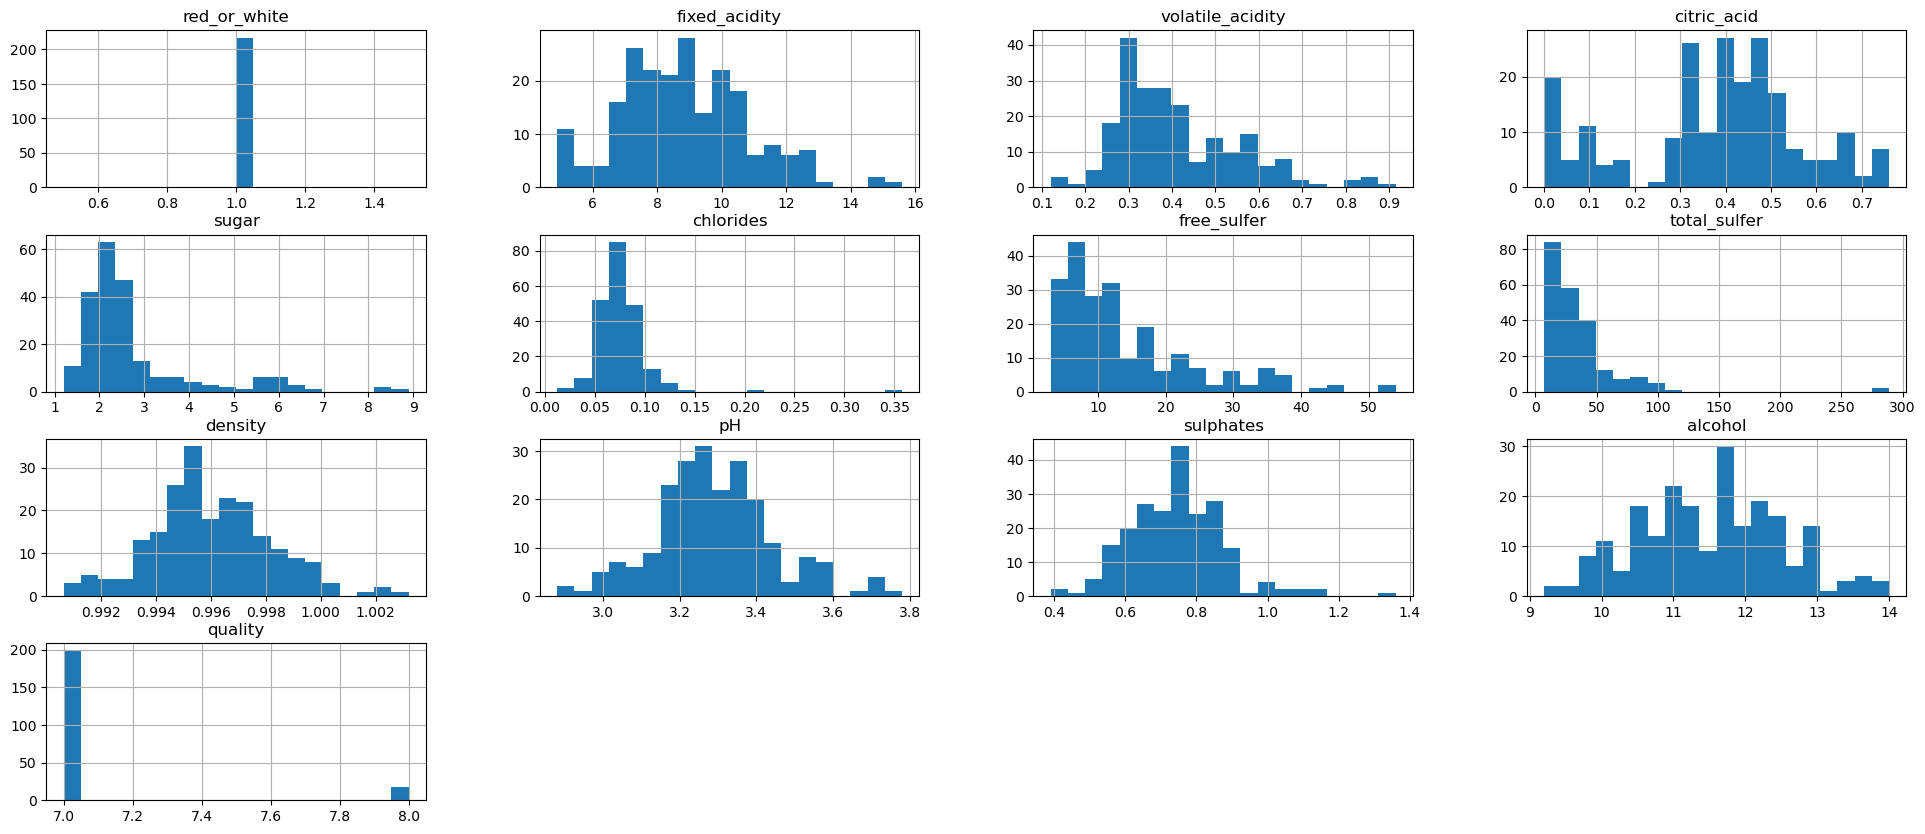

In [15]:
good_red.hist(figsize=(24, 10), bins=20)
plt.show()
# good wine distributions

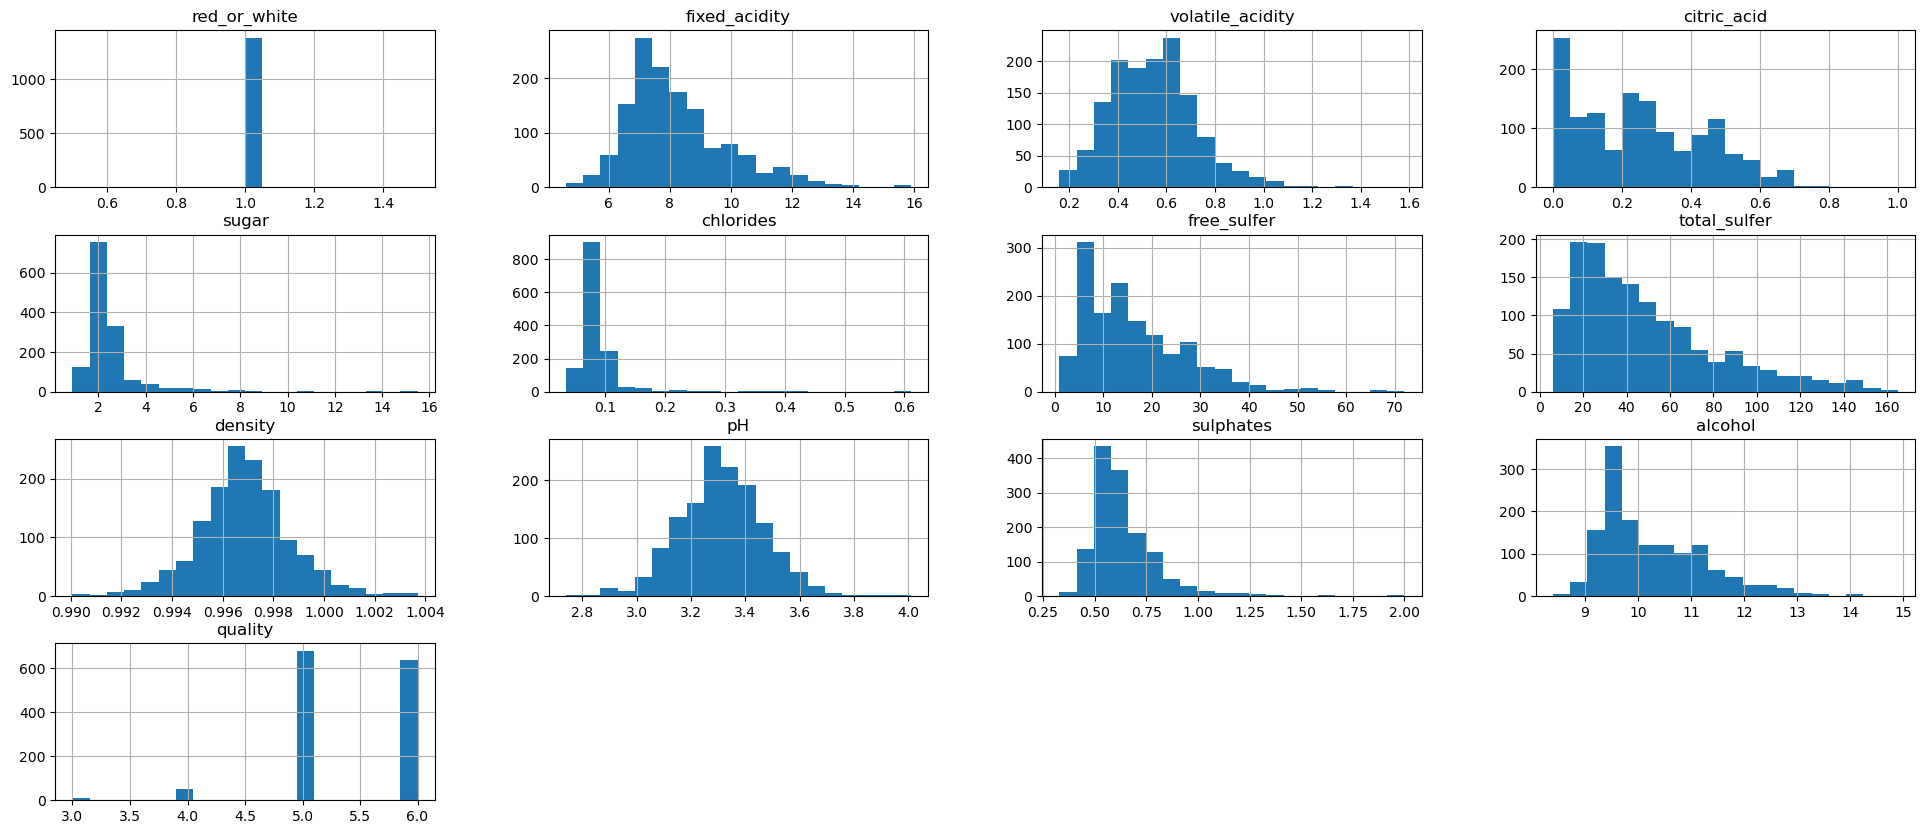

In [16]:
bad_red.hist(figsize=(24, 10), bins=20)
plt.show()
# bad red distributions

In [17]:
good_white = wine[wine.red_or_white == 0]
good_white = good_white[good_white.quality >= 7 ]
good_white.red_or_white.count()/len(wine[wine.red_or_white == 0])
## ratio of high quality whites

0.21641486320947326

In [18]:
X = train[['volatile_acidity', 'free_sulfer']]
# setting variable for clusters

In [19]:
seed = 123

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)
# creating a kmeans and fitting it

array([1, 1, 2, ..., 0, 2, 0], dtype=int32)

In [20]:
train['cluster'] = kmeans.predict(X)
# predicitons for the clusters

In [21]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()
# adding predictions to dataframe

,volatile_acidity,free_sulfer,unscaled_clusters
3899,0.30,28.0,1
5268,0.37,41.0,1
332,0.58,21.0,2
274,0.65,27.0,1
4326,0.17,34.0,1


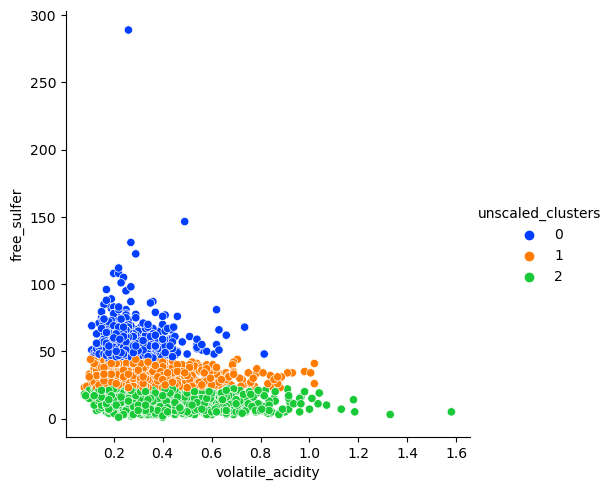

In [22]:
sns.relplot(data=X, x='volatile_acidity', y='free_sulfer', hue='unscaled_clusters', palette = 'bright')
plt.show()
# Visualization of unscaled clusters

In [23]:
mm_scaler = MinMaxScaler()

X[['volatile_acidity', 'free_sulfer']] = mm_scaler.fit_transform(X[['volatile_acidity', 'free_sulfer']])

X.head()
# scaling and setting up data for reclustering

,volatile_acidity,free_sulfer,unscaled_clusters
3899,0.146667,0.093750,1
5268,0.193333,0.138889,1
332,0.333333,0.069444,2
274,0.380000,0.090278,1
4326,0.060000,0.114583,1


In [24]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['volatile_acidity', 'free_sulfer']])
# creating and fitting new kmeans

KMeans(n_clusters=3, random_state=123)

In [25]:
kmeans_scale.predict(X[['volatile_acidity', 'free_sulfer']])
# adding predictions

array([2, 2, 1, ..., 2, 2, 0], dtype=int32)

In [26]:
X['scaled_clusters'] = kmeans_scale.predict(X[['volatile_acidity', 'free_sulfer']])

X.head()

,volatile_acidity,free_sulfer,unscaled_clusters,scaled_clusters
3899,0.146667,0.093750,1,2
5268,0.193333,0.138889,1,2
332,0.333333,0.069444,2,1
274,0.380000,0.090278,1,1
4326,0.060000,0.114583,1,0


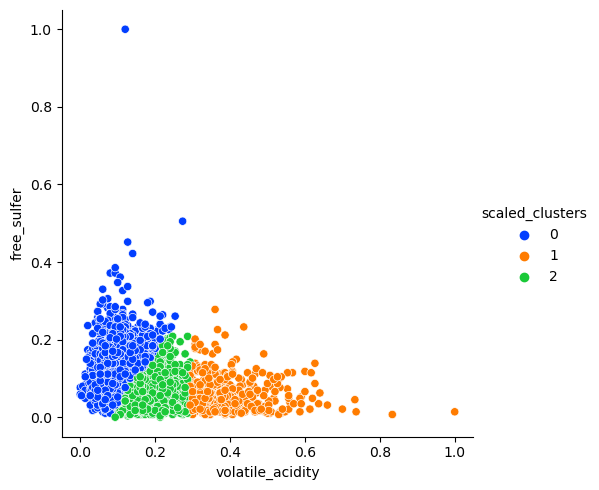

In [27]:
sns.relplot(data=X, x='volatile_acidity', y='free_sulfer', hue='scaled_clusters', palette = 'bright')
plt.show()
# visualization of scaled clustering

In [28]:
X['quality'] = train['quality']
X[X.scaled_clusters == 2].count()

volatile_acidity     1154
free_sulfer          1154
unscaled_clusters    1154
scaled_clusters      1154
quality              1154
dtype: int64

1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.

2. Does the quality differ between red or white wine?

3. Is there a relationship between quality and volatile acidity? (Linear or otherwise).

4. Is there a relationship between chlorides and quality? (Linear or otherwise).

5. If we control for good or bad wine, does quality differ across density?

***1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.***

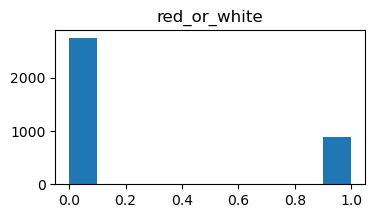

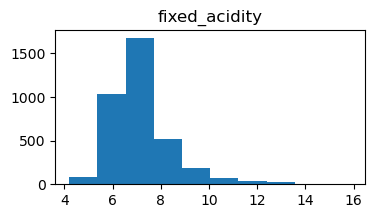

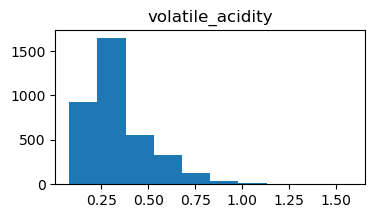

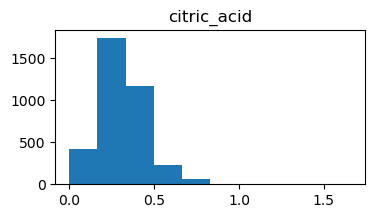

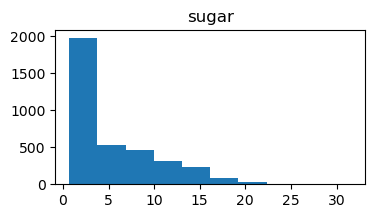

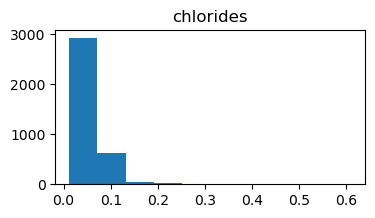

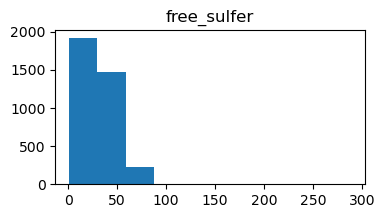

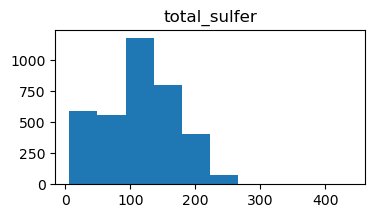

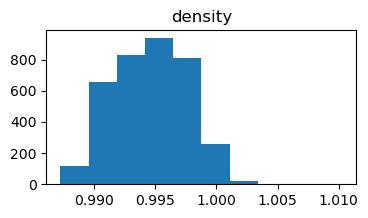

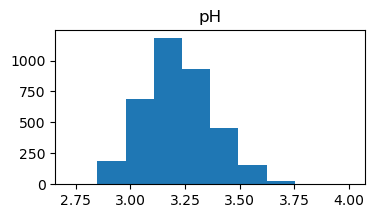

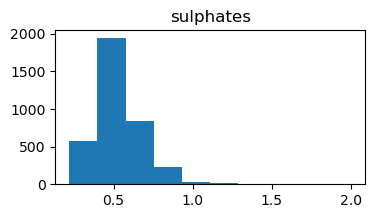

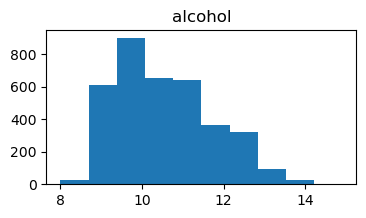

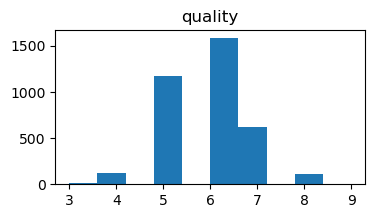

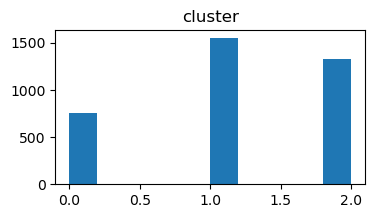

In [29]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    # another visualization of distribution

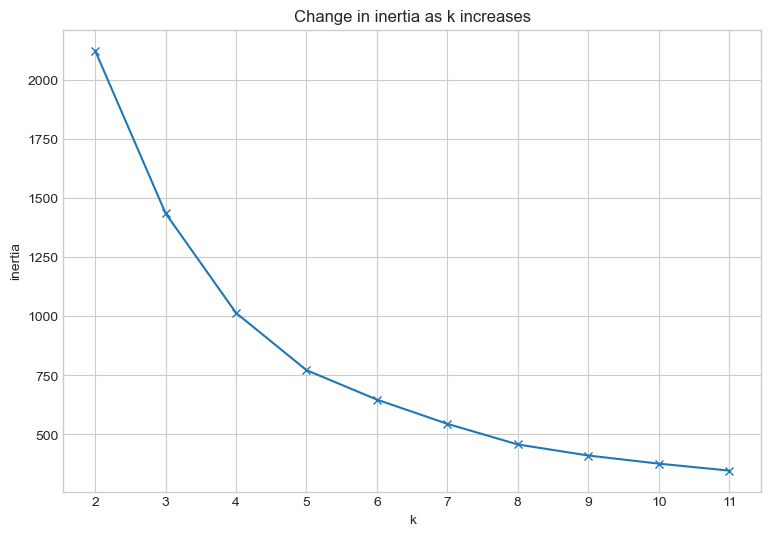

In [30]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()
    # Amount of clusters to use using the elbow method

In [56]:
train['good_or_not'] = train.quality >= 6
train
# Creating a column that is a binary good or not good rating

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality,cluster,good_or_not
3899,0,7.3,0.30,0.33,2.3,0.043,28.0,125.0,0.99084,3.34,0.44,12.6,7,1,True
5268,0,5.9,0.37,0.32,1.6,0.029,41.0,102.0,0.98916,3.41,0.55,12.7,7,1,True
332,1,8.0,0.58,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6,2,True
274,1,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5,1,False
4326,0,6.5,0.17,0.31,1.5,0.041,34.0,121.0,0.99092,3.06,0.46,10.5,6,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,7.0,0.15,0.34,1.4,0.039,21.0,177.0,0.99270,3.32,0.62,10.8,5,2,False
2129,0,6.4,0.10,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.7,6,1,True
5437,0,6.5,0.41,0.22,4.8,0.052,49.0,142.0,0.99460,3.14,0.62,9.2,5,0,False
481,1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,2,True


<AxesSubplot:xlabel='alcohol', ylabel='count'>

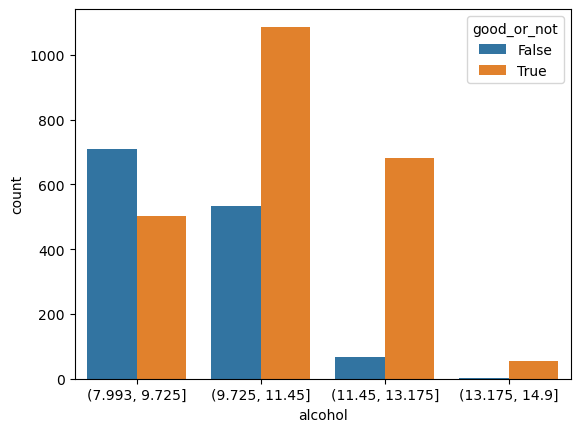

In [57]:
binned = pd.cut(x = train.alcohol, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='volatile_acidity', ylabel='count'>

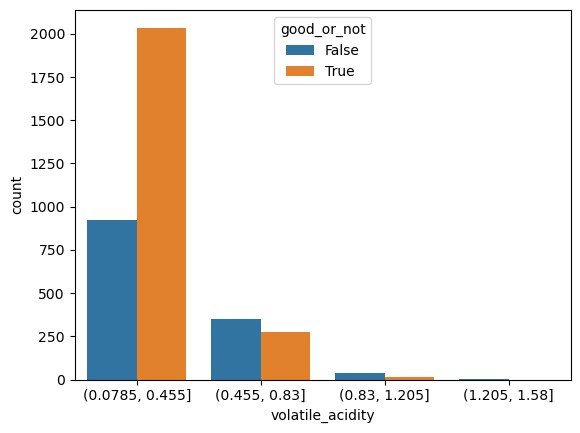

In [58]:
binned = pd.cut(x = train.volatile_acidity, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='fixed_acidity', ylabel='count'>

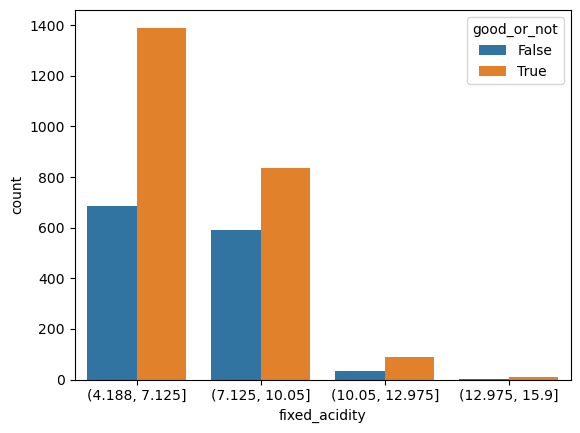

In [59]:
binned = pd.cut(x = train.fixed_acidity, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='citric_acid', ylabel='count'>

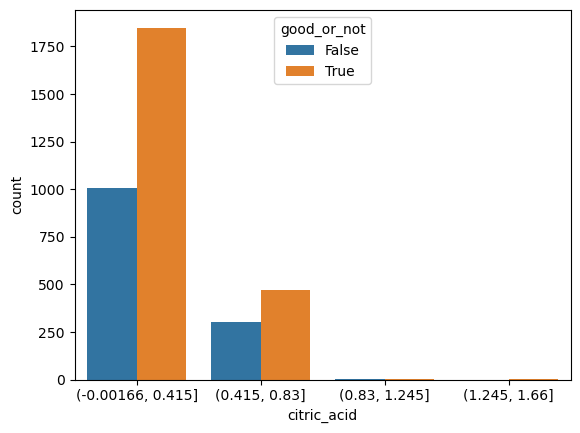

In [60]:
binned = pd.cut(x = train.citric_acid, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='sugar', ylabel='count'>

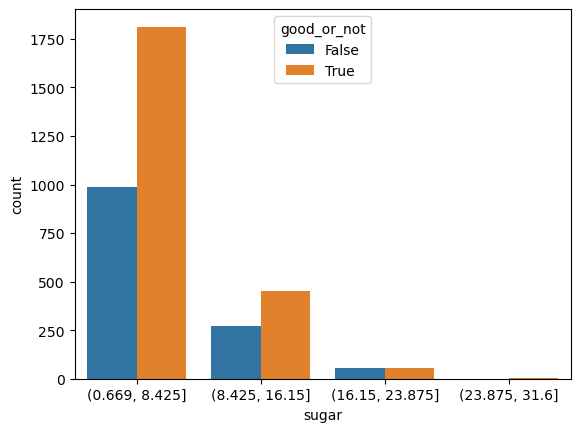

In [61]:
binned = pd.cut(x = train.sugar, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='chlorides', ylabel='count'>

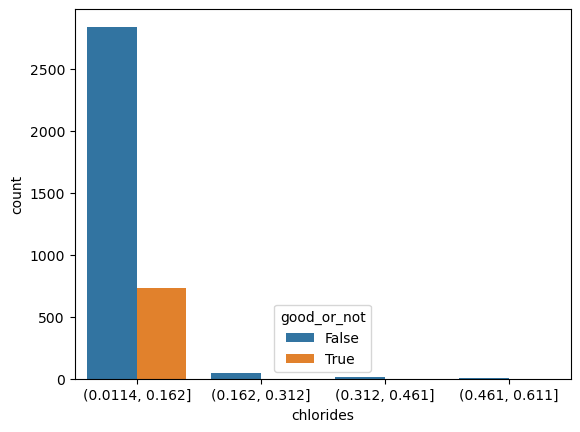

In [37]:
binned = pd.cut(x = train.chlorides, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='free_sulfer', ylabel='count'>

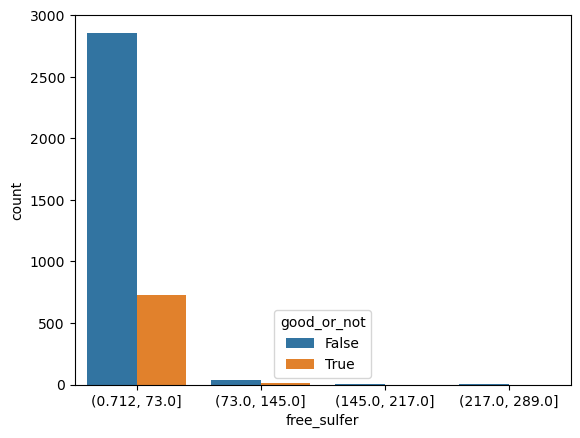

In [38]:
binned = pd.cut(x = train.free_sulfer, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='total_sulfer', ylabel='count'>

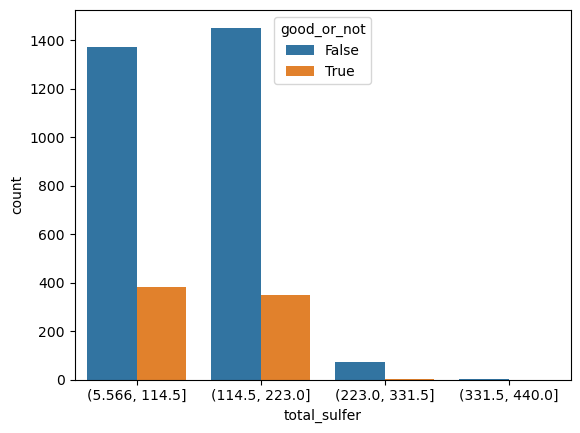

In [39]:
binned = pd.cut(x = train.total_sulfer, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='density', ylabel='count'>

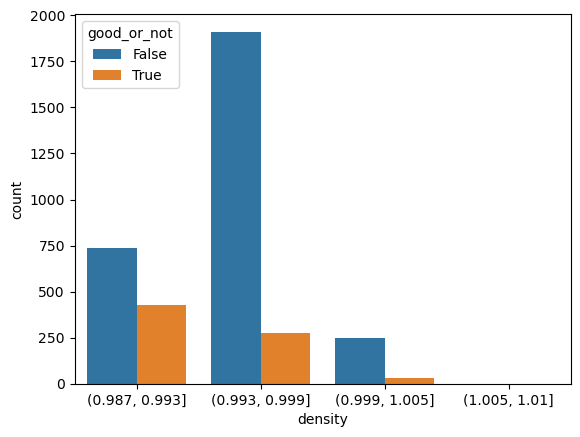

In [40]:
binned = pd.cut(x = train.density, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

<AxesSubplot:xlabel='pH', ylabel='count'>

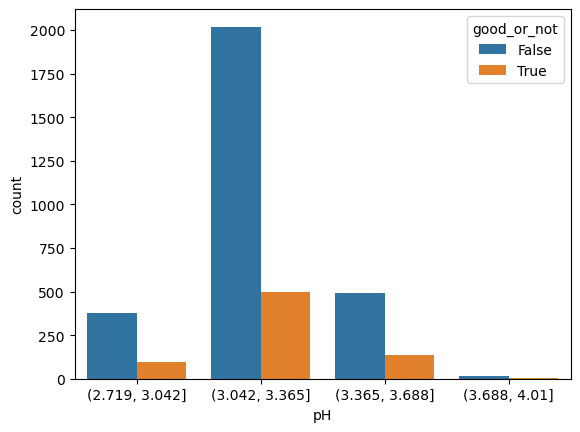

In [41]:
binned = pd.cut(x = train.pH, bins = 4)
sns.countplot(data = train, x = binned, hue = 'good_or_not')
# binning the x value as well to make a more readable graph 
# creating a binned visualization of wine by good or not good column

## After Visualization the features that are going to be used in clusters are alcohol, volatile_acidity, sugar, citric_acid, and density

In [42]:
t, p = ttest_1samp(train.alcohol[train.quality >= 7], train.alcohol.mean())
t, p/2

(20.634628837423307, 2.6830780600456723e-75)

## Hypothesis
- Null(There is no difference between mean and high quality)

In [43]:
for col in train:
    t, p = ttest_1samp(train[{col}][train.quality>= 7], train[col].mean())
    if p/2 <= .05 and t != 0:
        print(f'{col} rejects Null hypothesis')
        print(t, p/2)
        print('------------------')
        print('\n')

red_or_white rejects Null hypothesis
[-5.99543401] [1.58925233e-09]
------------------


fixed_acidity rejects Null hypothesis
[-3.27127373] [0.00056027]
------------------


volatile_acidity rejects Null hypothesis
[-10.51493851] [1.72885011e-24]
------------------


citric_acid rejects Null hypothesis
[2.60020294] [0.00475188]
------------------


sugar rejects Null hypothesis
[-3.9838633] [3.72729464e-05]
------------------


chlorides rejects Null hypothesis
[-14.01764488] [4.83640126e-40]
------------------


total_sulfer rejects Null hypothesis
[-3.08872213] [0.00104289]
------------------


density rejects Null hypothesis
[-15.33266356] [1.48924065e-46]
------------------


alcohol rejects Null hypothesis
[20.63462884] [2.68307806e-75]
------------------


quality rejects Null hypothesis
[95.64151056] [0.]
------------------


good_or_not rejects Null hypothesis
[inf] [0.]
------------------




In [54]:
cdf = train_scaled[['alcohol', 'volatile_acidity', 'citric_acid', 'density', 'sugar', 'sulphates']]
cdf.info()
# Creating a dataframe of just features moving to clustering

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 3899 to 3107
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           3637 non-null   float64
 1   volatile_acidity  3637 non-null   float64
 2   citric_acid       3637 non-null   float64
 3   density           3637 non-null   float64
 4   sugar             3637 non-null   float64
 5   sulphates         3637 non-null   float64
dtypes: float64(6)
memory usage: 327.9 KB


cdf.loc[:, c[i]].values
####### Checking arrays of features

## Code that was too many loops but basis for final

c = list(combinations(cdf.columns, r = 2))
kmeans = KMeans(n_clusters=3, random_state=seed)
for obj in c:
    for i in range(0, len(c)):
        x = cdf.loc[:, c[i]].values
        kmeans.fit(x)
        y = kmeans.predict(x)
    sns.relplot(x = cdf[obj[0]], y = cdf[obj[1]], hue = y, palette = 'bright')
    plt.xlabel(obj[0])
    
    

In [45]:
for obj in c:
    print(list(obj))
    # Making the features inot a tuple that can be used to create clusters

NameError: name 'c' is not defined

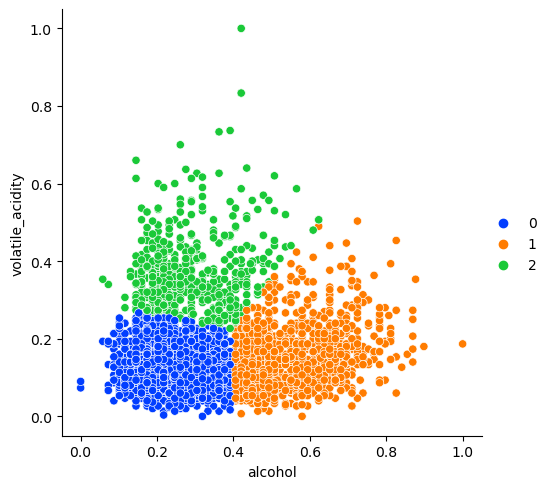

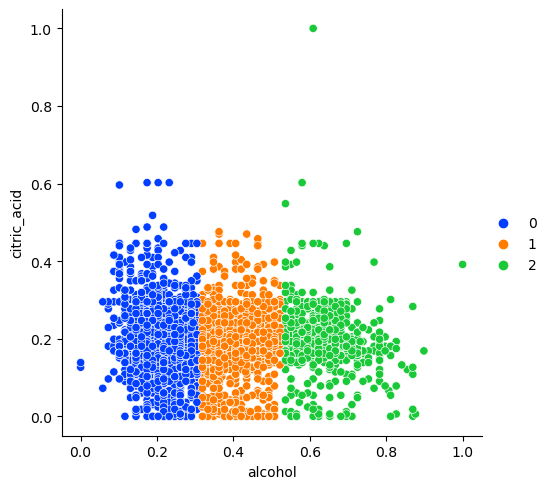

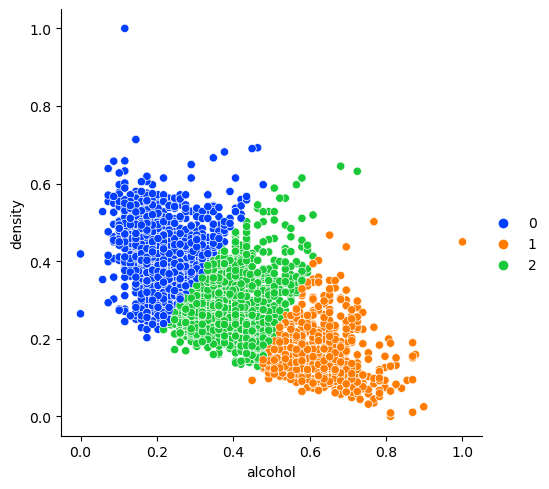

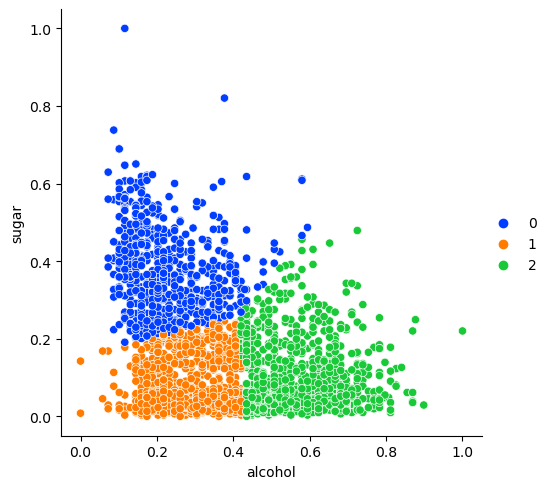

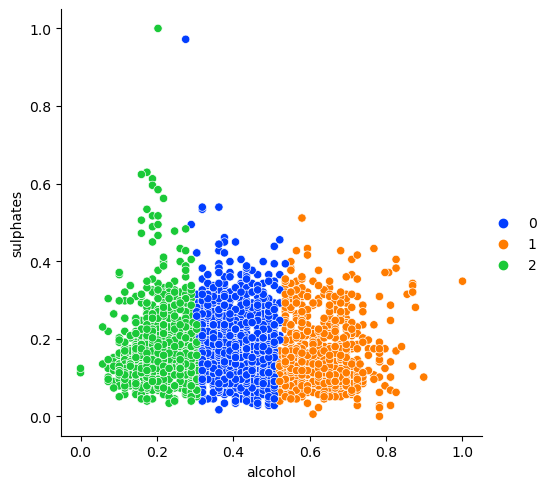

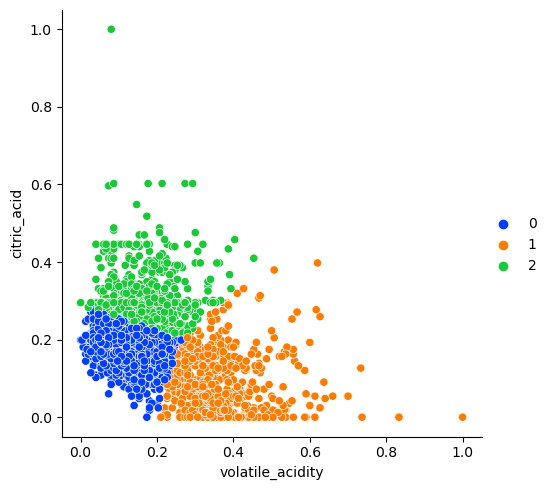

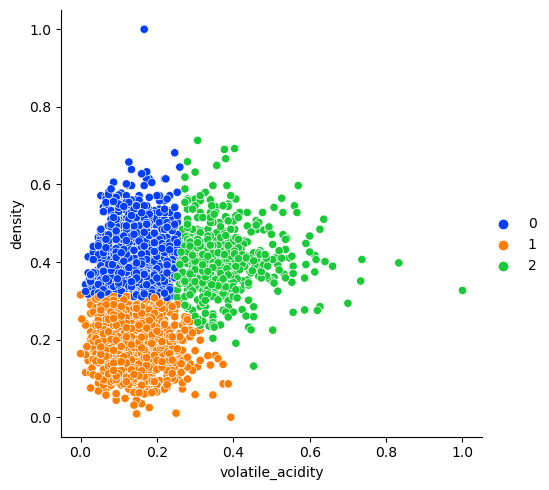

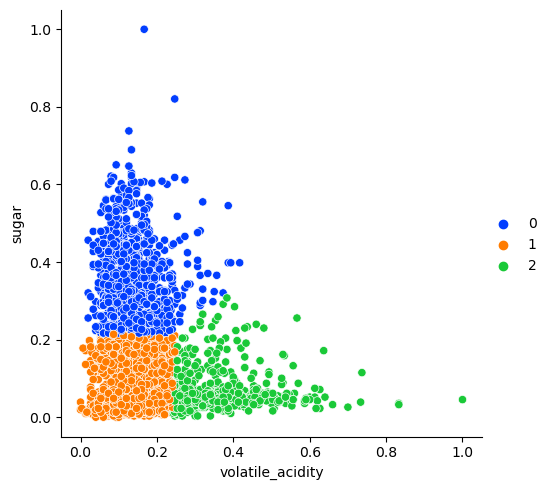

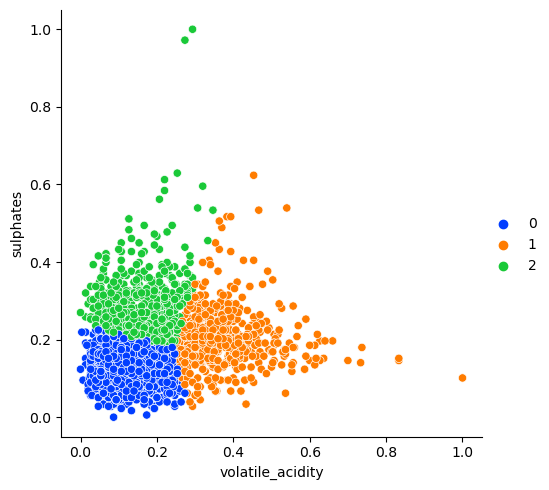

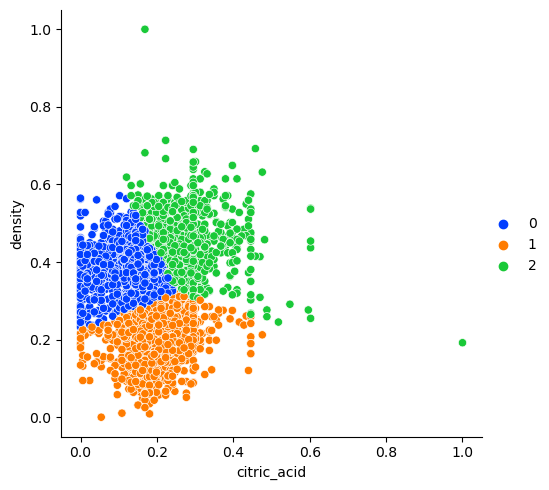

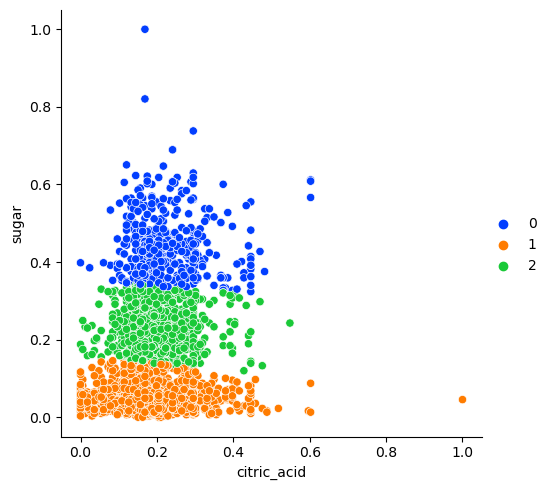

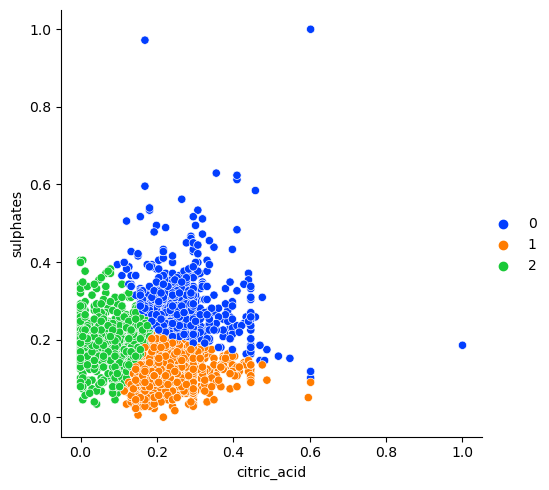

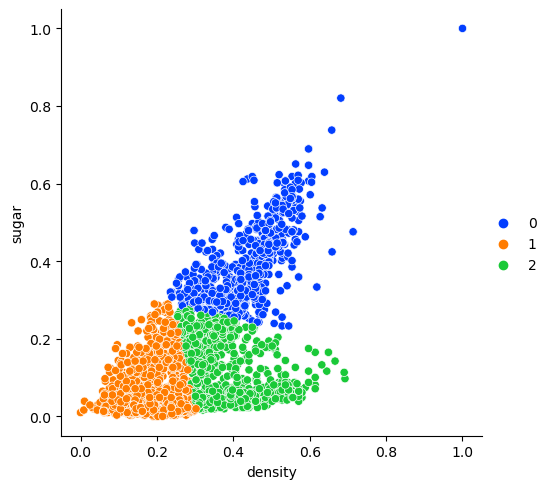

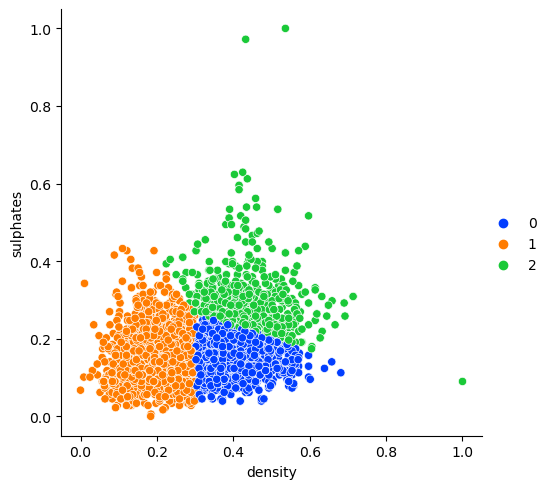

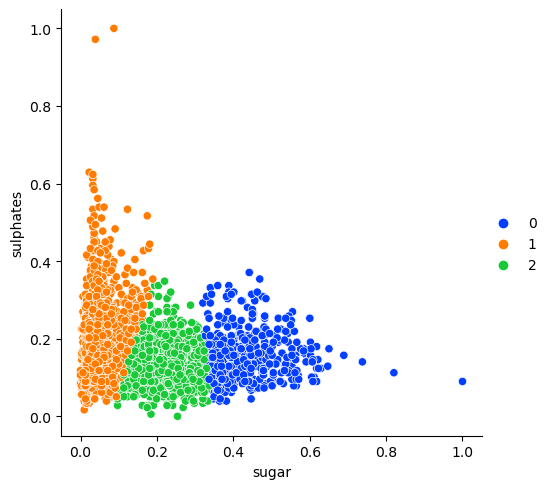

In [55]:
c = list(combinations(cdf.columns, r = 2))
kmeans = KMeans(n_clusters=3, random_state=seed)
for obj in c:
    x = cdf[list(obj)]
    kmeans.fit(x)
    pred = kmeans.predict(x)
    sns.relplot(x = cdf[obj[0]], y = cdf[obj[1]], hue = pred, palette = 'bright')
    
    # Loop that creates clusters on all possible pairings with correct labels

In [ ]:
df = cdf
df['quality'] = train.quality

In [ ]:
df
# adding quality back on to a new dataframe that will be moved to modeling

### Clusters that are moving forward to modeling:
- Volatile acidity and alcohol
- Density and alcohol
- Sugar and Density
- Citric and Volatile Acidity

Text(0, 0.5, 'Quantity')

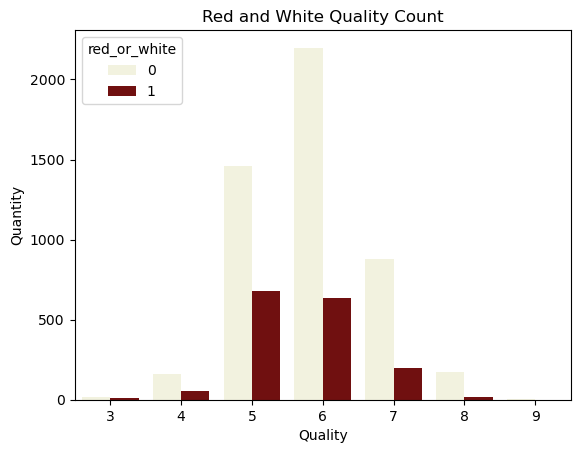

In [52]:
sns.countplot(data = wine, x = 'quality', hue = 'red_or_white', palette = ('beige', 'maroon'))
plt.title('Red and White Quality Count')
plt.xlabel('Quality')
plt.ylabel('Quantity')

In [ ]:
cdf = train_scaled[['alcohol', 'volatile_acidity', 'citric_acid', 'density', 'sugar', 'sulphates']]
cdf.info()
# Creating a dataframe of just features moving to clustering

In [ ]:
c = list(combinations(cdf.columns, r = 2))
kmeans = KMeans(n_clusters=3, random_state=seed)
for obj in c:
    x = cdf[list(obj)]
    kmeans.fit(x)
    pred = kmeans.predict(x)
    sns.relplot(x = cdf[obj[0]], y = cdf[obj[1]], hue = pred, palette = 'bright')
    
    # Loop that creates clusters on all possible pairings with correct labels